# Life Expectancy / GDP Portfolio Project


## Scoping out the Data
Below I scoped out the data I was working with to ensure that the columns we're all workable data-types, and looked at the data that I have in front of me.

**Observations** 
- Data looks clean
- 5 Countries
- 16 Years of Data
- 2 quantitative sets of data (Life Expectancy & GDP)

In [2]:
import pandas as pd

df = pd.read_csv('all_data.csv')
print(df.dtypes)
#print(df.Country.values)
#print(df.Year.values)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


## Goals of Analysis

**Questions**
- Which countries have the highest average life expectancy?
- Which countries have the highest average GDP?
- Is there a linear correlation between GDP and Life Expectancy? 
 - **Null hypothesis**: there is no correlation between to two samples of GDP and Life Expectancy
 - If there is a correlation, what is the trend of both GDP and Life Expectancy?
- Does life expectancy depend on country?
 - **Null Hypothesis:** Life expectancy does not depend on country

## Analysis

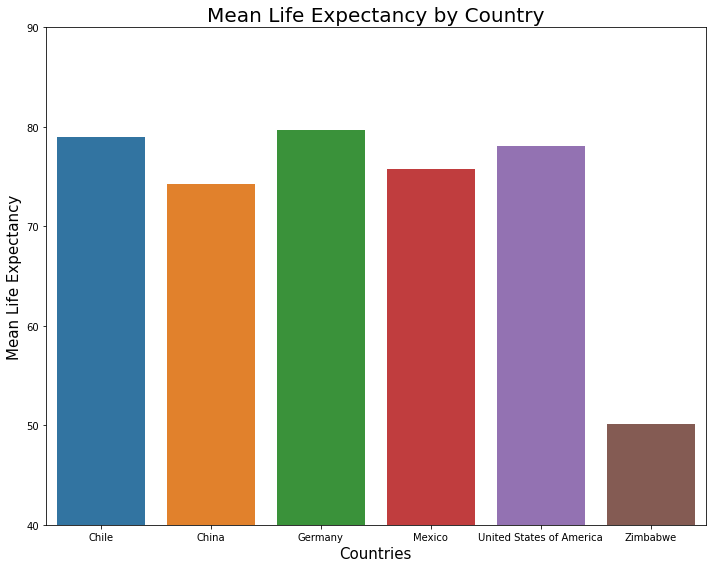

In [46]:
# Which countries have the highest life expectancy?
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

countries = df.Country.unique()
life_exp = []

for country in countries:
    array = df[df['Country']==country]
    life_exp.append(np.mean(array['Life expectancy at birth (years)']))

f, ax1 = plt.subplots(figsize=(10,8))
sns.barplot(data=df, x=countries, y=life_exp)
plt.ylim([40,90])
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Mean Life Expectancy', fontsize = 15)
plt.title('Mean Life Expectancy by Country', fontsize = 20)
plt.tight_layout()

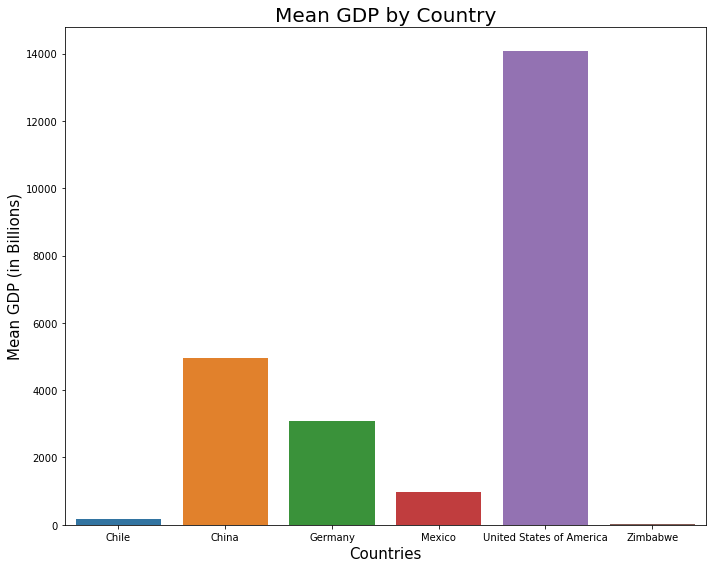

In [45]:
# Which countries have the highest GDP?

gdp = []

for country in countries:
    array = df[df['Country']==country]
    gdp.append(np.mean(array['GDP'])/1000000000)

f, ax2 = plt.subplots(figsize=(10,8))
sns.barplot(data=df, x=countries, y=gdp)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Mean GDP (in Billions)', fontsize = 15)
plt.title('Mean GDP by Country', fontsize = 20)
plt.tight_layout()

Text(0, 0.5, 'Life Expectancy')

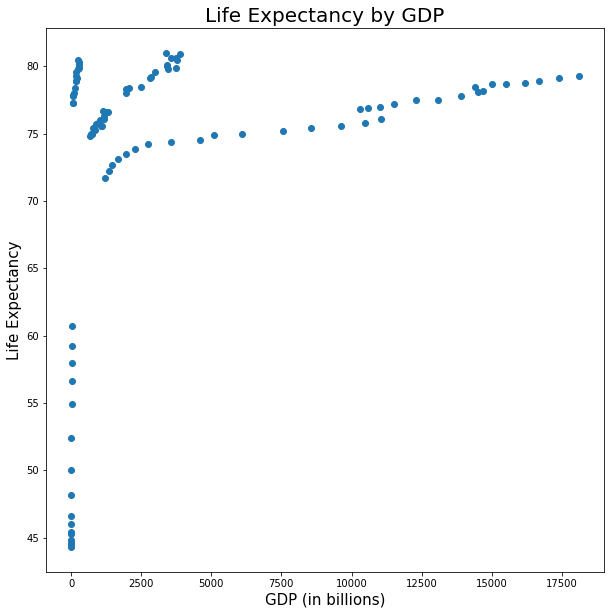

In [47]:
# Is there a correlation between GDP and Life Expectancy?

gdp_all = [x/1000000000 for x in df.GDP.values]
life_exp_all = [x for x in df['Life expectancy at birth (years)']]

f, ax3 = plt.subplots(figsize=(10,10))
plt.scatter(gdp_all, life_exp_all)
plt.title('Life Expectancy by GDP' ,fontsize = 20)
plt.xlabel('GDP (in billions)', fontsize = 15)
plt.ylabel('Life Expectancy', fontsize = 15)

## Correlation Analysis

Looking at the above graph, it is very clear that there is no linear relationship between overall GDP and overall life expectancy aside from the sample past a GDP of 4000(in billions).

In [54]:
# Does life expectancy depend on country? ANOVA Test
# Chile, China, Germany, Mexico, USA, Zimbabwe

from scipy import stats

chile_le = df[df['Country']=='Chile']['Life expectancy at birth (years)'].values
china_le = df[df['Country']=='China']['Life expectancy at birth (years)'].values
germany_le = df[df['Country']=='Germany']['Life expectancy at birth (years)'].values
mexico_le = df[df['Country']=='Mexico']['Life expectancy at birth (years)'].values
usa_le = df[df['Country']=='United States of America']['Life expectancy at birth (years)'].values
zimbabwe_le = df[df['Country']=='Zimbabwe']['Life expectancy at birth (years)'].values

stats.f_oneway(chile_le, china_le, germany_le, mexico_le, usa_le, zimbabwe_le)

F_onewayResult(statistic=305.22921290515353, pvalue=7.885135700050126e-55)

## ANOVA Analysis

After looking at the ANOVA results, there is a pvalue of 7.88e-55, a VERY low value for datapoints that would suggest the rejection of the Null hypothesis. We can conclude in favor of the null hypothesis that **life expectancy does not depend on the country you live in**.

# Conclusion

